# UIDAI Data Hackathon 2026

## Notebook 03
Aadhaar Update Quality & Data Issues Analysis

### Objective
To analyze demographic and biometric update patterns in Aadhaar data to identify data quality issues, high-frequency update regions, and potential operational inefficiencies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8")


In [2]:
# Load cleaned update datasets
demo_df = pd.read_csv("../data/demographic_updates_cleaned.csv")
bio_df = pd.read_csv("../data/biometric_updates_cleaned.csv")

print("Demographic Updates Shape:", demo_df.shape)
print("Biometric Updates Shape:", bio_df.shape)

demo_df.head()


Demographic Updates Shape: (2071700, 6)
Biometric Updates Shape: (1861108, 6)


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,2025-03-01,Uttar Pradesh,Gorakhpur,273213,49,529
1,2025-03-01,Andhra Pradesh,Chittoor,517132,22,375
2,2025-03-01,Gujarat,Rajkot,360006,65,765
3,2025-03-01,Andhra Pradesh,Srikakulam,532484,24,314
4,2025-03-01,Rajasthan,Udaipur,313801,45,785


In [3]:
# Create total update counts
demo_df['total_demo_updates'] = demo_df.drop(columns=['date', 'state', 'district', 'pincode']).sum(axis=1)
bio_df['total_bio_updates'] = bio_df.drop(columns=['date', 'state', 'district', 'pincode']).sum(axis=1)

demo_df[['total_demo_updates']].head(), bio_df[['total_bio_updates']].head()


(   total_demo_updates
 0                 578
 1                 397
 2                 830
 3                 338
 4                 830,
    total_bio_updates
 0                857
 1                513
 2               1734
 3               1236
 4               1086)

In [4]:
# State-wise demographic updates
state_demo_updates = (
    demo_df
    .groupby('state')['total_demo_updates']
    .sum()
    .reset_index()
    .sort_values(by='total_demo_updates', ascending=False)
)

# State-wise biometric updates
state_bio_updates = (
    bio_df
    .groupby('state')['total_bio_updates']
    .sum()
    .reset_index()
    .sort_values(by='total_bio_updates', ascending=False)
)

state_demo_updates.head(), state_bio_updates.head()


(             state  total_demo_updates
 50   Uttar Pradesh             8542328
 32     Maharashtra             5054602
 7            Bihar             4814350
 55     West Bengal             3872318
 31  Madhya Pradesh             2912938,
              state  total_bio_updates
 43   Uttar Pradesh            9577735
 27     Maharashtra            9226139
 26  Madhya Pradesh            5923771
 5            Bihar            4897587
 39      Tamil Nadu            4698117)

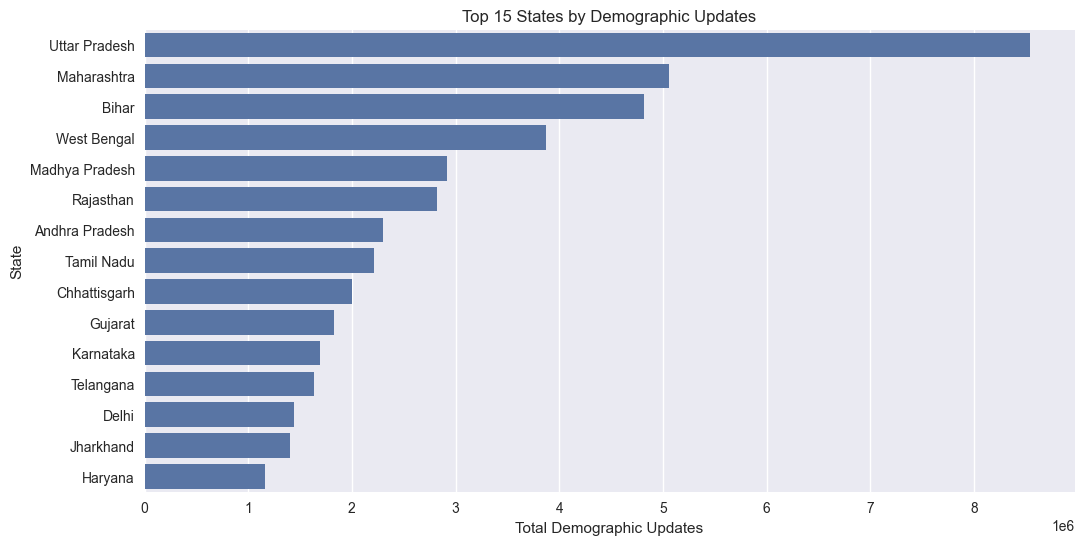

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_demo_updates.head(15),
    x='total_demo_updates',
    y='state'
)
plt.title("Top 15 States by Demographic Updates")
plt.xlabel("Total Demographic Updates")
plt.ylabel("State")
plt.show()


In [6]:
# Merge state-wise demographic and biometric updates
state_updates = pd.merge(
    state_demo_updates,
    state_bio_updates,
    on='state',
    how='inner'
)

state_updates.head()


,state,total_demo_updates,total_bio_updates
0,Uttar Pradesh,8542328,9577735
1,Maharashtra,5054602,9226139
2,Bihar,4814350,4897587
3,West Bengal,3872318,2524506
4,Madhya Pradesh,2912938,5923771


In [7]:
# Calculate update ratio
state_updates['update_ratio'] = (
    state_updates['total_demo_updates'] /
    (state_updates['total_bio_updates'] + 1)
)

state_updates.sort_values(by='update_ratio', ascending=False).head(10)


,state,total_demo_updates,total_bio_updates,update_ratio
45,Westbengal,152,31,4.750000
46,West Bengal,107,28,3.689655
44,West Bangal,157,54,2.854545
47,Uttaranchal,5,2,1.666667
3,West Bengal,3872318,2524506,1.533891
37,Dadra And Nagar Haveli And Daman And Diu,3740,2532,1.476510
25,Chandigarh,83361,74482,1.119195
12,Delhi,1438934,1304362,1.103170
21,Manipur,301549,282587,1.067098
16,Assam,1012578,982722,1.030380


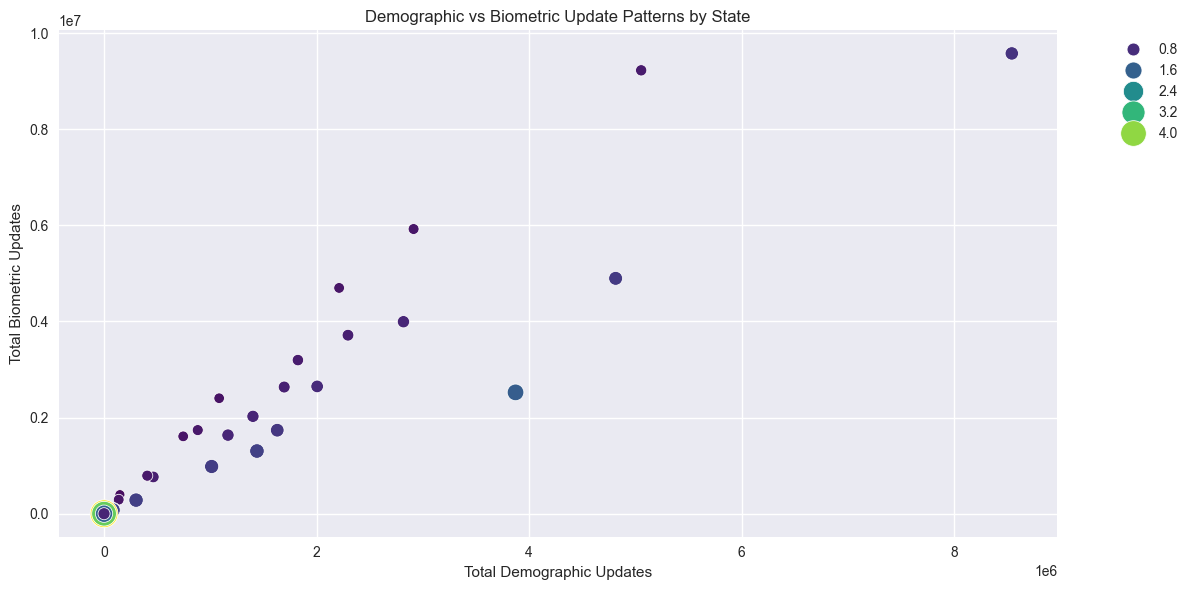

In [8]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=state_updates,
    x='total_demo_updates',
    y='total_bio_updates',
    size='update_ratio',
    hue='update_ratio',
    sizes=(40, 400),
    palette='viridis'
)

plt.title("Demographic vs Biometric Update Patterns by State")
plt.xlabel("Total Demographic Updates")
plt.ylabel("Total Biometric Updates")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
state_updates.to_csv(
    "../final_report/state_update_quality_summary.csv",
    index=False
)

print("Update quality summary saved")


Update quality summary saved
